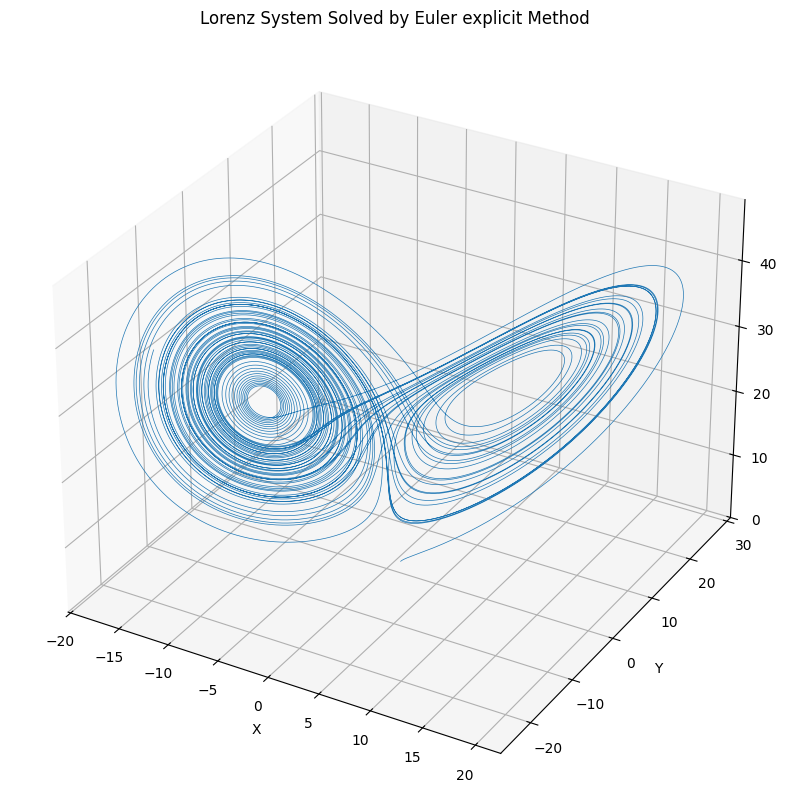

In [1]:
from lorenz import *
from euler import *
from plot import *

#initial conditions
u0 = np.array([1.,1.,1.])
tspan = np.array([0.,60.])
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda _, state :lorenz(_, state, sigma, rho, beta)
Nh = 100000

t, u = feuler(lorenz_sys, tspan, u0, Nh)
plot3d(t, u, "Lorenz System Solved by Euler explicit Method")


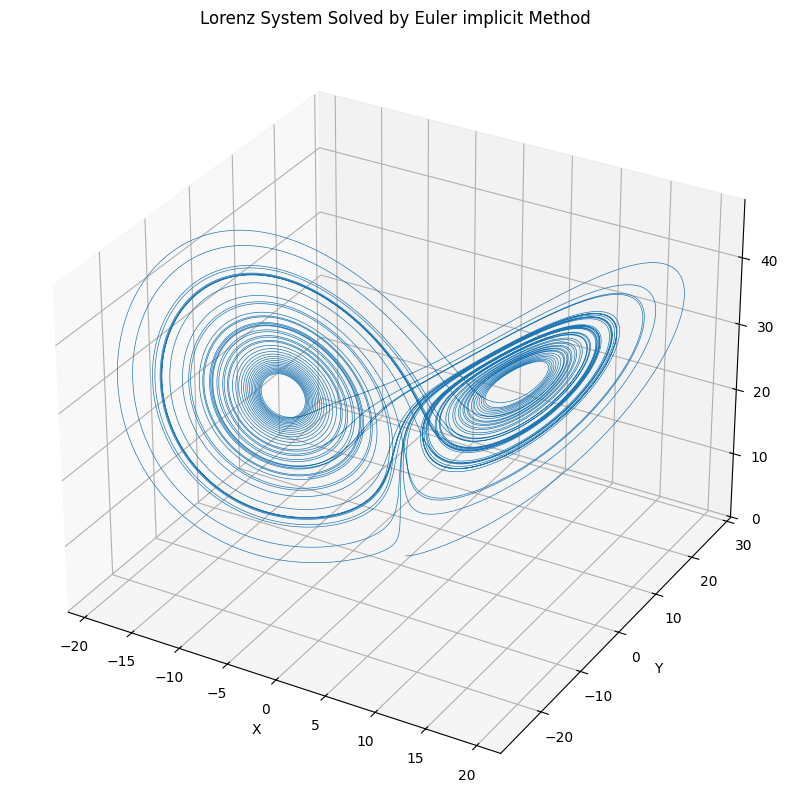

In [2]:
#initial conditions
u0 = np.array([0.2,0.8,1.])
tspan = np.array([0.,60.])
Nh = 100000
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda _, state :lorenz(_, state, sigma, rho, beta)

t, u = beuler(lorenz_sys, tspan, u0, Nh)
plot3d(t, u, "Lorenz System Solved by Euler implicit Method")

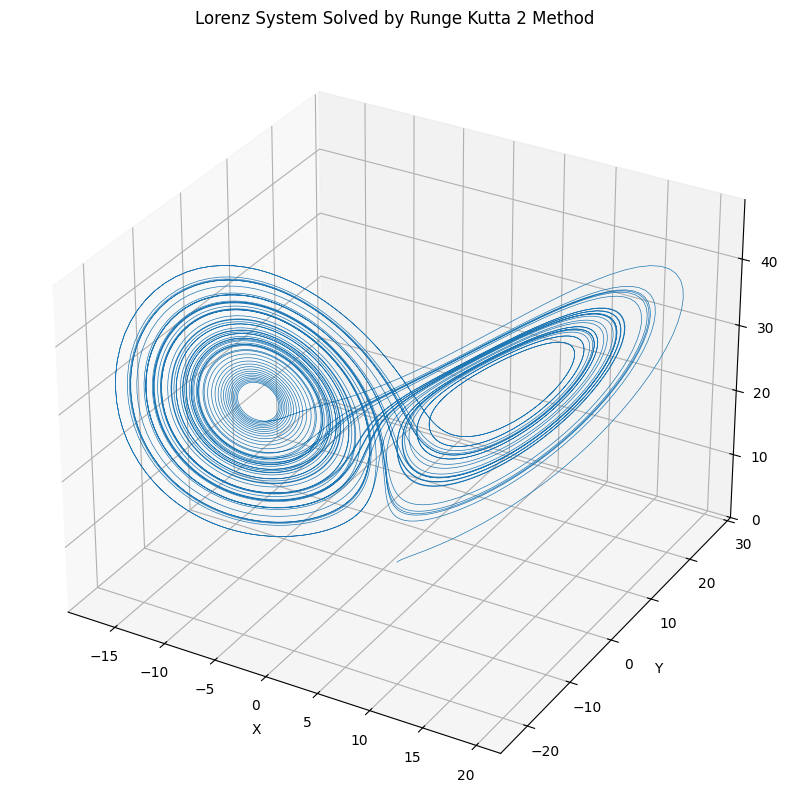

In [3]:
from runge_kutta import *

#initial conditions
u0 = np.array([1.,1.,1.])
tspan = np.array([0.,60.])
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda _, state:lorenz(_, state, sigma, rho, beta)
Nh = 10000

t, u = rungekutta2(lorenz_sys, tspan, u0, Nh)
plot3d(t, u, "Lorenz System Solved by Runge Kutta 2 Method")


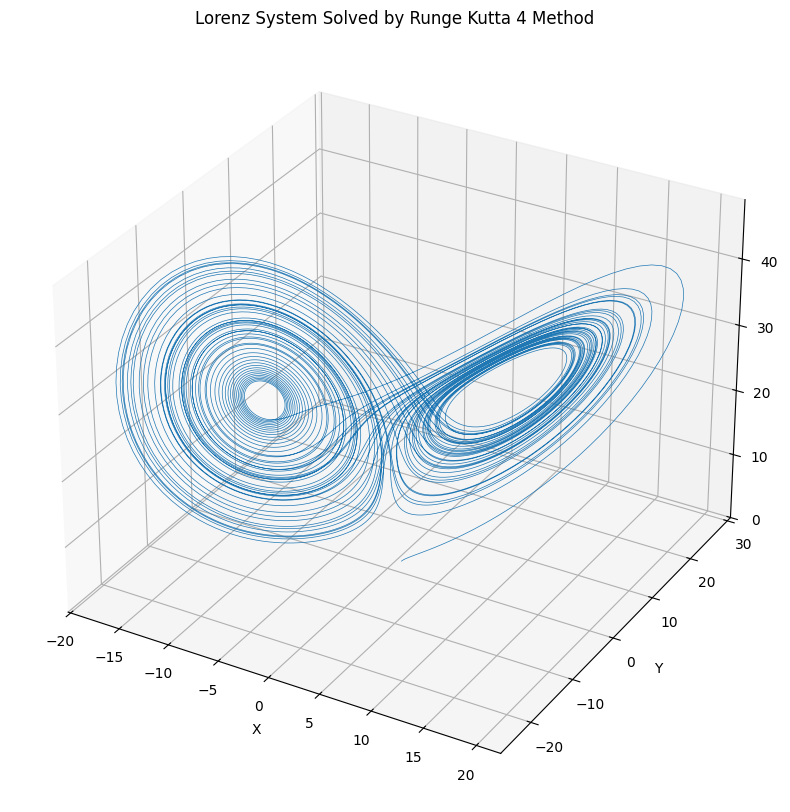

In [4]:
#initial conditions
u0 = np.array([1.,1.,1.])
tspan = np.array([0.,60.])
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda _, state:lorenz(_, state, sigma, rho, beta)
Nh = 10000

t, u = rungekutta4(lorenz_sys, tspan, u0, Nh)
plot3d(t, u, "Lorenz System Solved by Runge Kutta 4 Method")

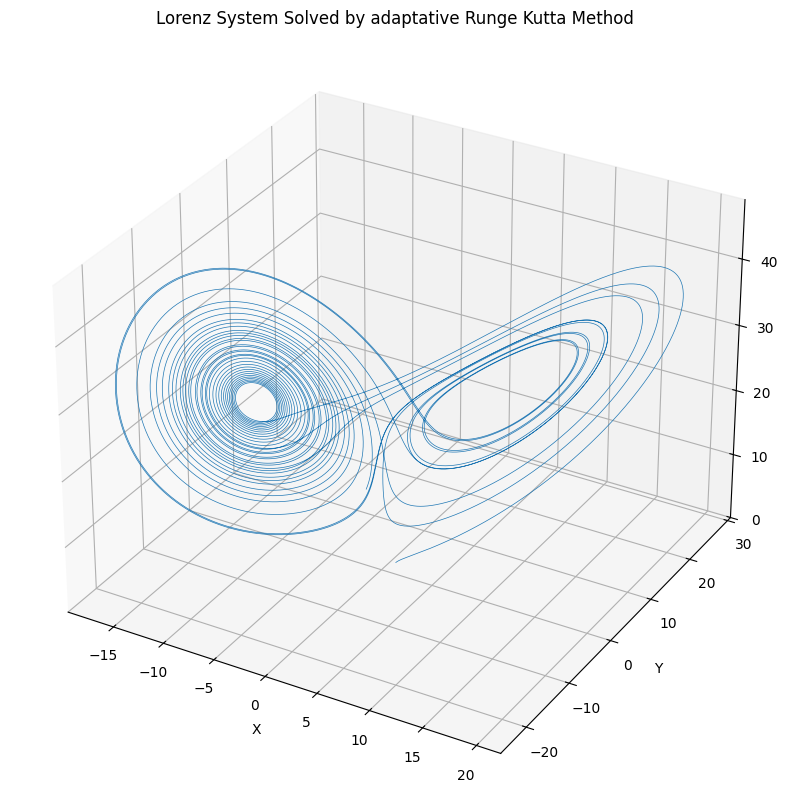

In [5]:
#initial conditions
u0 = np.array([1.,1.,1.])
tspan = np.array([0.,60.])
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda _, state:lorenz(_, state, sigma, rho, beta)
Nh = 100
hmax = 0.1

t, u = adaptive_rungekutta4(lorenz_sys, tspan, u0, hmax)
plot3d(t, u, "Lorenz System Solved by adaptative Runge Kutta Method")

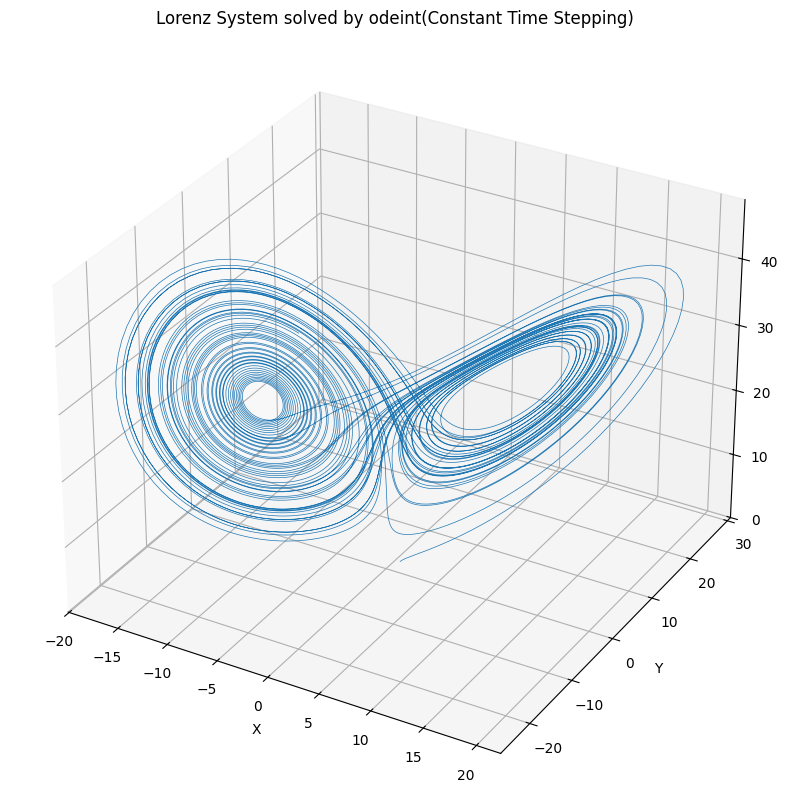

In [6]:
from scipy.integrate import odeint

# Initial conditions
u0 = [1.0, 1.0, 1.0]

# Model parameters
sigma, rho, beta = 10.0, 28.0, 8/3

# Solve the Lorenz ODE system with constant time stepping
t_span = [0, 60]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# odeint(func, y0, t, args=()), func(y, t, ...)
lorenz_odeint = lambda state,t:lorenz(t, state, sigma, rho, beta)

sol = odeint(lorenz_odeint, u0, t_eval)

# Plot the Lorenz attractor in 3D
plot3d(t, sol, "Lorenz System solved by odeint(Constant Time Stepping)")

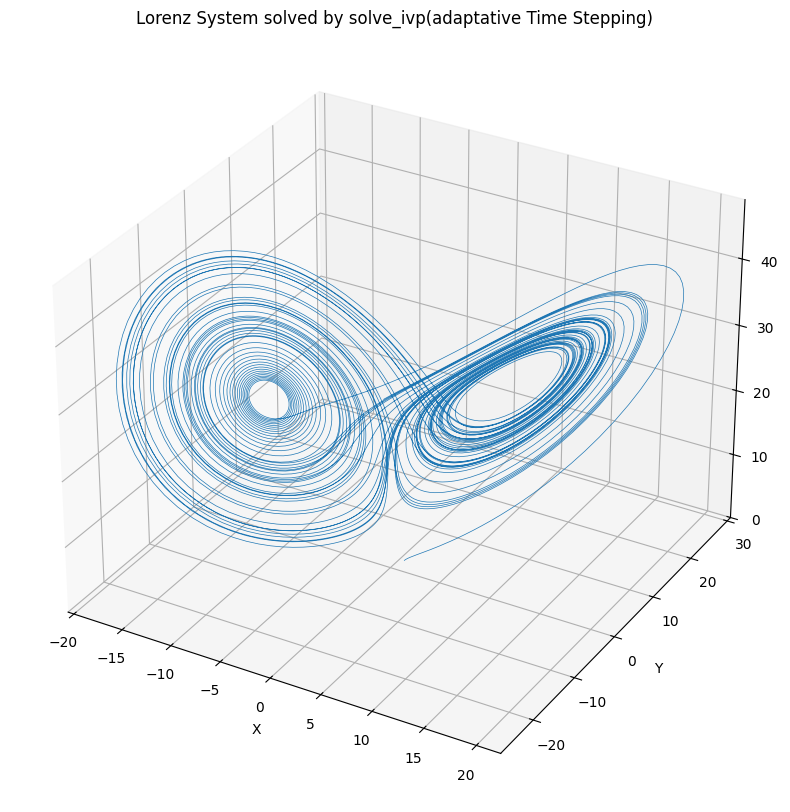

In [7]:
from scipy.integrate import solve_ivp

# Initial conditions
u0 = [1.0, 1.0, 1.0]

# Model parameters
sigma, rho, beta = 10.0, 28.0, 8/3

# Solve the Lorenz ODE system with adaptive time stepping
t_span = [0, 60]

# solve_ivp(func, t, y0, args=()), func(t, y, ...)
lorenz_odeint = lambda t, state:lorenz(t, state, sigma, rho, beta)

sol = solve_ivp(lorenz_odeint, t_span, u0, rtol=1e-8, atol=1e-8)

# Plot the Lorenz attractor in 3D
plot3d(t, sol.y.T, "Lorenz System solved by solve_ivp(adaptative Time Stepping)")

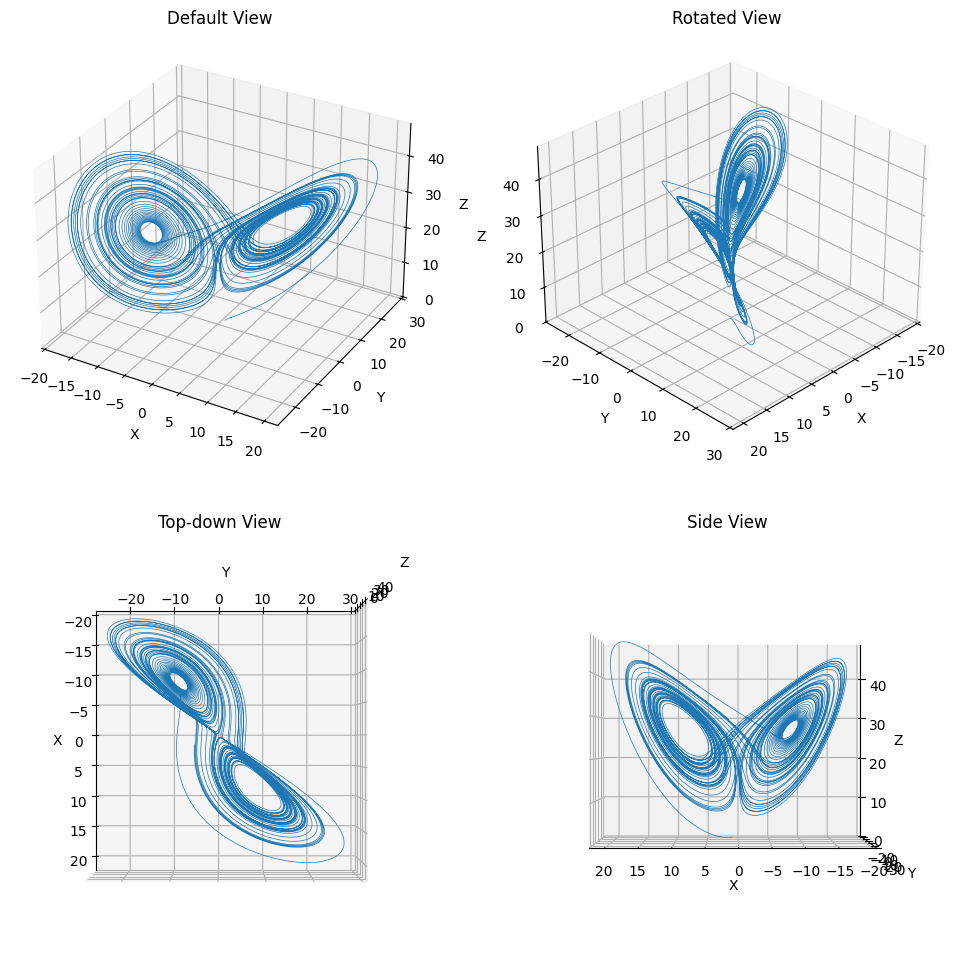

In [8]:
# Plot the Lorenz attractor in 3D from different angles
fig = plt.figure(figsize=(12, 12))

# Plot 1: Default view
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax1.set_title('Default View')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot 2: Rotated view
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax2.view_init(elev=30, azim=45)
ax2.set_title('Rotated View')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot 3: Top-down view
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax3.view_init(elev=90, azim=0)
ax3.set_title('Top-down View')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Plot 4: Side view
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax4.view_init(elev=0, azim=90)
ax4.set_title('Side View')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.show()

Iteration 0, Error: 0.20725539834214063
Iteration 1, Error: 0.21094792440247964
Iteration 2, Error: 0.22772045572683136
Iteration 3, Error: 0.22490115272983516
Iteration 4, Error: 0.21986101779475303
Solution after 5 iterations: [[ 1.          1.          1.        ]
 [ 1.0045388   1.15580731  0.99054914]
 [ 1.01781148  1.31225232  0.98223539]
 ...
 [ 5.45460296  4.98711232 23.98942883]
 [ 5.37369428  5.03807712 23.72670616]
 [ 5.300791    5.10050894 23.46324446]]


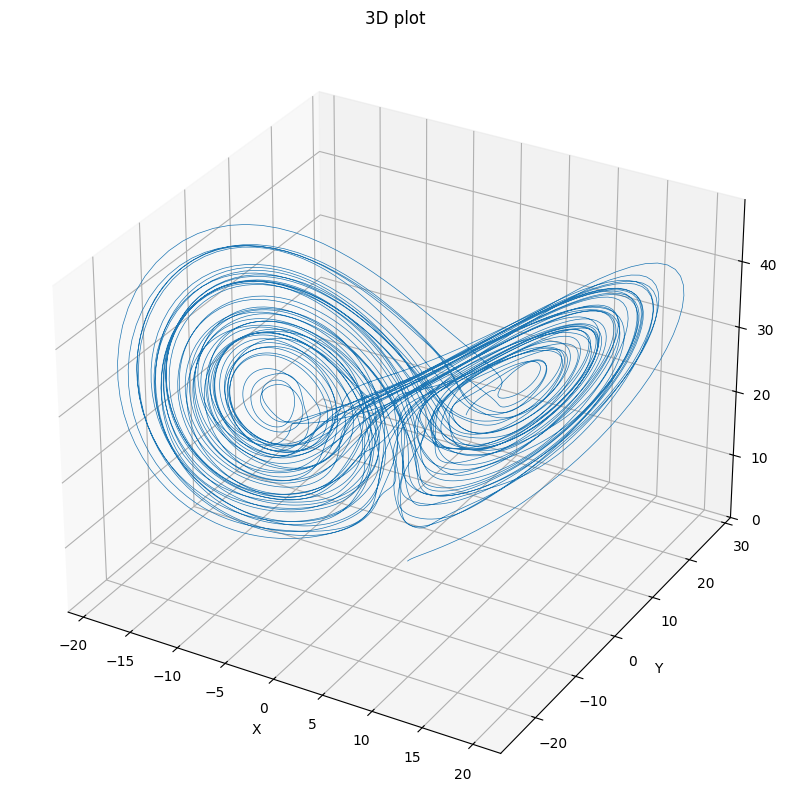

In [9]:
from parareal import *

# Parameters

# Model parameters
sigma, rho, beta = 10.0, 28.0, 8/3
lorenz_ = lambda t,state:lorenz(t, state, sigma, rho, beta)

U0 = np.array([1.0, 1.0, 1.0])
t_span = [0, 60]
N = 10000
tol = 1e-1
max_iter = 5
G_Nh=1
F_Nh=100
G = lambda tspan,u0, :feuler(lorenz_, tspan, u0, G_Nh)[1][-1]
F = lambda tspan,u0, :feuler(lorenz_, tspan, u0, F_Nh)[1][-1]

# Run Parareal
t, iterations, solution = parareal(G, F, tspan, U0, N, max_iter, tol)
print(f'Solution after {iterations} iterations: {solution}')
plot3d(t,solution)

Iteration 0, Error: 0.0
Iteration 0, Error: 0.0
Iteration 0, Error: 0.0
Iteration 0, Error: 0.0
Iteration 0, Error: 0.0


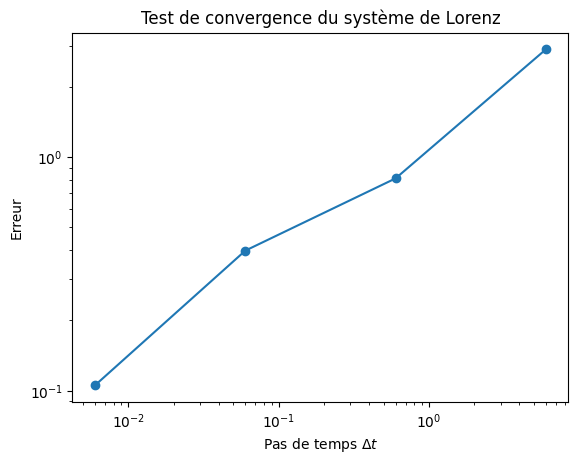

In [10]:
# Model parameters
sigma, rho, beta = 10.0, 28.0, 8/3
lorenz_ = lambda t,state:lorenz(t, state, sigma, rho, beta)

U0 = np.array([1.0, 1.0, 1.0])
t_span = [0, 60]
N = 100000
tol = 1e-1
max_iter = 10
G_Nh=1
F_Nh=1
G = lambda tspan,u0, :beuler(lorenz_, tspan, u0, G_Nh)[1][-1]
F = lambda tspan,u0, :beuler(lorenz_, tspan, u0, F_Nh)[1][-1]

# Run Parareal
t_reference, iterations, sol_reference = parareal(G, F, tspan, U0, N, max_iter, tol)
dt_reference = t_reference[1]-t_reference[0]


Ns = np.array([10,100,1000,10000])
dts=[]
errors = []

for n in Ns:
    t, iterations, sol = parareal(G, F, tspan, U0, n, max_iter, tol)
    dts .append(t[1]-t[0])
    # Interpolation de la solution de référence pour correspondre aux temps calculés
    sol_reference_interp = np.interp(t, t_reference, sol_reference[:,0])
    error = np.linalg.norm(sol[:,0] - sol_reference_interp) / len(t)
    errors.append(error)

# Affichage des résultats de convergence
plt.loglog(dts, errors, '-o')
plt.xlabel('Pas de temps $\Delta t$')
plt.ylabel('Erreur')
plt.title('Test de convergence du système de Lorenz')
plt.show()